In [1]:
%load_ext autoreload

In [53]:
%autoreload 2
from data_scaling import experiments as exp1
# from sensor_types import experiments as exp2
# from sensor_types_extended import experiments as exp2

created folder: /fsx/python_ml/flow_reconstruction/spatio_reconstruction_ann/data_scaling/experiment_1
config saved at: experiment_1
######################## Experiment details ########################

Experiment details:
    Experiment folder name: /fsx/python_ml/flow_reconstruction/spatio_reconstruction_ann/data_scaling/experiment_1

Dataset configuration:
    Dataset filepath: original_paper/flow_cylinder.npy
    Dataset oscillation start index: 0
    Unseen dataset filepath: {'diamond_ar_1p25': 'primitives/diamond_ar_1p25/w_z.npy', 'diamond_ar_1p5': 'primitives/diamond_ar_1p5/w_z.npy', 'diamond_ar_1p66': 'primitives/diamond_ar_1p66/w_z.npy', 'diamond_ar_2p0': 'primitives/diamond_ar_2p0/w_z.npy', 'triangle_ar_1p25': 'primitives/triangle_ar_1p25/w_z.npy', 'triangle_ar_1p5': 'primitives/triangle_ar_1p5/w_z.npy', 'triangle_ar_1p66': 'primitives/triangle_ar_1p66/w_z.npy', 'triangle_ar_2p0': 'primitives/triangle_ar_2p0/w_z.npy', 'cylinder_half': 'primitives/cylinder_half/w_z.npy', 'cyli

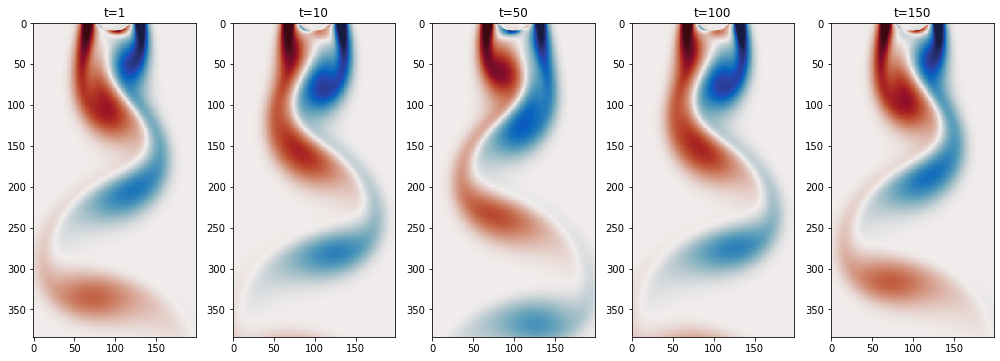

######################## Reshaping and scaling data ########################
Split data details:
    train_data has 100 examples
    test_data has 51 examples

Scaled data details:
    train_data_rescaled has min: -3.1230, max: 2.6636, mean: 0.0000
    test_data_rescaled has min: -3.1149, max: 2.6493, mean: -0.0069

Reshaped data details:
    train_data_reshaped has the shape: (100, 1, 76416)
    test_data_reshaped has the shape: (51, 1, 76416)

######################## Extracting sensor inputs ########################
Extracted sensor data details:
    sensors has the shape: (100, 1, 5)
    sensors_test has the shape: (51, 1, 5)



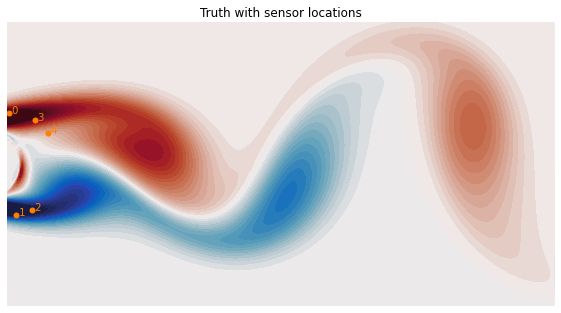

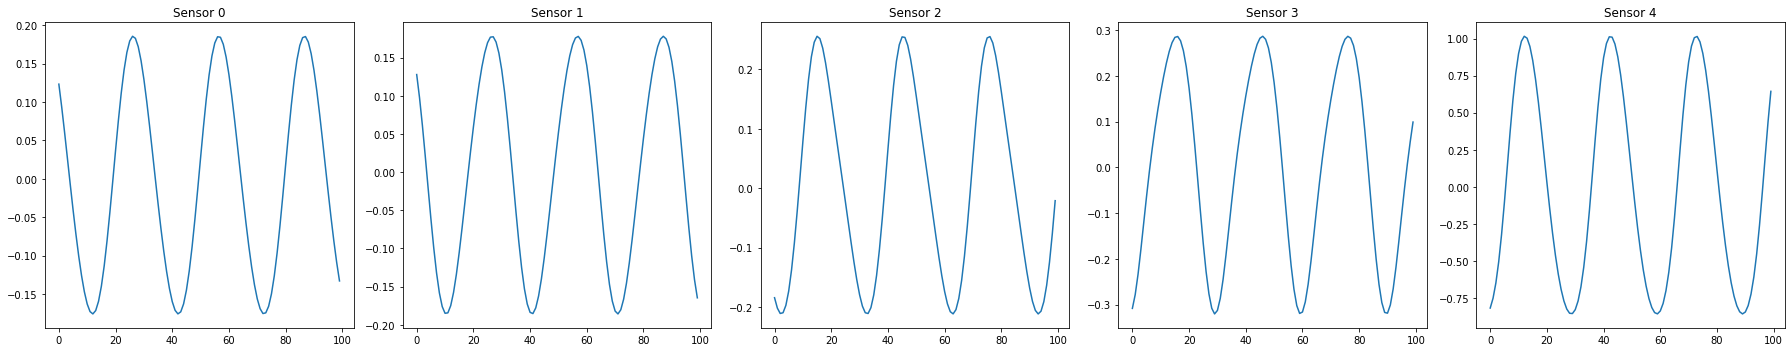

######################## Initialising model ########################
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 40)             240       
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 40)             160       
_________________________________________________________________
dense_1 (Dense)              (None, 1, 45)             1845      
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 45)             180       
_________________________________________________________________
dense_2 (Dense)              (None, 1, 76416)          3515136   
Total params: 3,517,561
Trainable params: 3,517,391
Non-trainable params: 170
_________________________________________________________________
######################## Training model #

KeyboardInterrupt: 

In [4]:
%autoreload 2
from data_scaling import experiments as exp1
from utils import *

exp1.experiment_1(train_model=True)

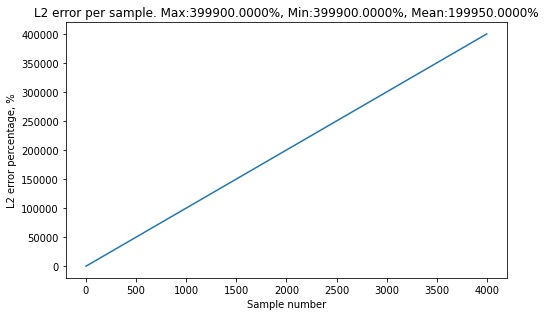

In [51]:
t = 800
m = 384
n = 199
error = np.arange(t)

samples = np.arange(800, step=400)
# samples = [0]

fig, axs = plt.subplots(len(samples), 1, facecolor='white', edgecolor='k', figsize=(7.9, 4.7*len(samples)))
for idx, sample in enumerate(samples):
    if len(samples) > 1:
        ax = axs[idx]
    else:
        ax = axs
    if idx < len(samples)-1:
        error_sample = error[sample:samples[idx+1]]
    else:
        error_sample = error[sample:]
        
    ax.plot(range(error_sample.shape[0]), error_sample[:]*100)
    ax.set_title(f'L2 error per sample. Max:{error_sample.max()*100:.4f}%, Min:{error_sample.max()*100:.4f}%, Mean:{error_sample.mean()*100:.4f}%')
    ax.set_ylabel('L2 error percentage, %')
    ax.set_xlabel('Sample number')
